In [1]:
from gensim.models import KeyedVectors
from gensim.test import test_data
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
questions_en = '/home/levai/.miniconda3/envs/gensim/lib/python3.8/site-packages/gensim/test/test_data/questions-words.txt'

In [6]:
questions = '/mnt/permanent/Language/Hungarian/Embed/questions-words-hu/questions-words-hu.txt'

In [2]:
vectors_en = KeyedVectors.load('/mnt/permanent/Language/English/Embed/glove.840B.300d.gensim')

In [3]:
vectors = KeyedVectors.load('/mnt/permanent/Language/Hungarian/Embed/mnsz2/glf/mnsz-glf-sgram-600.gensim')

In [5]:
def get_accuracies(vectors, questions):
    score, sections = vectors.evaluate_word_analogies(questions)
    print(score)
    df_ = pd.DataFrame(sections)
    df_.set_index('section', inplace=True)
    df = df_.apply({'correct': len, 'incorrect': len})
    df['total'] = df.sum(axis=1)
    df['accuracy'] = df.correct / df.total
    df.drop(index=['Total accuracy'], inplace=True)
    return df

In [7]:
df_en = get_accuracies(vectors_en, questions_en)

0.7682115764314663


In [9]:
df = get_accuracies(vectors, questions)

0.19274598701139567


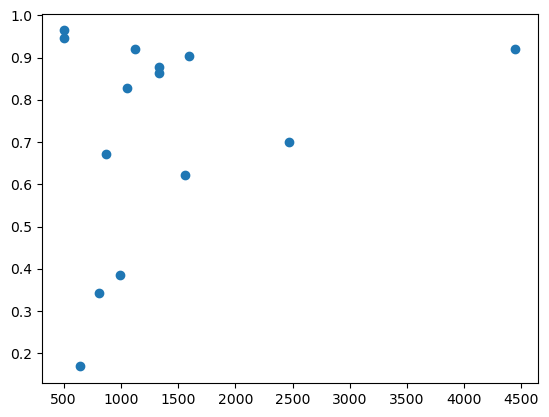

In [10]:
plt.scatter(df_en.total, df_en.accuracy)

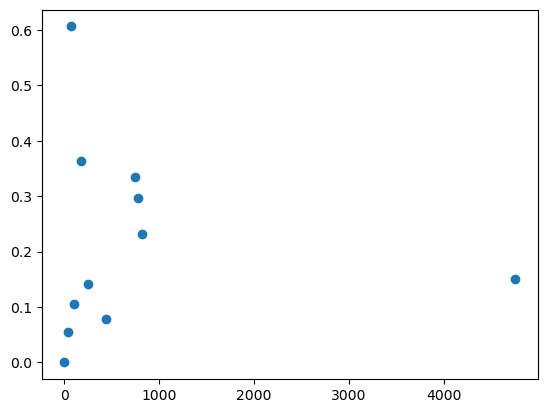

In [11]:
plt.scatter(df.total, df.accuracy)

# Webcorpus 2.0

In [16]:
def mean_semantic_accurcy(filen='sgns-300-2017_2018_2956-vanila'):
    model = KeyedVectors.load(f'/mnt/permanent/Language/Hungarian/Embed/webcorpus2.0/{filen}')
    df = get_accuracies(model.wv, questions)
    return df[~df.index.str.startswith('gram')].accuracy.mean()

In [17]:
mean_semantic_accurcy('sgns-300-2017_2018_2956-vanila')

0.000782472613458529


0.0

In [18]:
mean_semantic_accurcy('sgns-300-2017_2018_2956-deglut')

0.0


0.0

In [28]:
mean_semantic_accurcy('sgns-300-2017_2018_295-vanila')

0.054322429906542055


0.02938912938912939

In [29]:
mean_semantic_accurcy('sgns-300-2017_2018_295-deglut')

0.008741258741258742


0.03550724637681159

In [19]:
model = KeyedVectors.load('/mnt/permanent/Language/Hungarian/Embed/webcorpus2.0/sgns-300-2017_2018_2956-vanila')

In [27]:
model.wv.most_similar('márka')

[('Yankee', 0.5162225961685181),
 ('Candle', 0.49882271885871887),
 ('változatok', 0.4969162046909332),
 ('Ekkor', 0.4967857897281647),
 ('alapítója', 0.4961995482444763),
 ('íródni', 0.490958571434021),
 ('Vichy', 0.48201823234558105),
 ('ügyfélkezelésre', 0.4787764847278595),
 ('Gun', 0.47692400217056274),
 ('mindazokat', 0.47268223762512207)]